In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
class Agent:
    def __init__(self, initial_wealth):
        self.money = initial_wealth

    def consume(self, seller, quantity, amount):
        self.money -= amount
        seller.money += amount

class Simulation:
    def __init__(self, num_agents, initial_wealth, num_time_steps, buy_prob):
        self.num_agents = num_agents
        self.initial_wealth = initial_wealth
        self.num_time_steps = num_time_steps
        self.buy_prob = buy_prob
        self.agents = [Agent(initial_wealth) for _ in range(num_agents)]
        self.total_tax = 0

    def calculate_tax(self, wealth):
        scaled_slab_1, scaled_slab_2, scaled_slab_3, scaled_slab_4, scaled_slab_5 = 109, 218, 327, 435, 544
        if wealth <= scaled_slab_1:
            return 0
        elif wealth <= scaled_slab_2:
            return 0.05 * (wealth - scaled_slab_1)
        elif wealth <= scaled_slab_3:
            return 0.1 * (wealth - scaled_slab_2) + 0.05 * (scaled_slab_2 - scaled_slab_1)
        elif wealth <= scaled_slab_4:
            return 0.15 * (wealth - scaled_slab_3) + 0.1 * (scaled_slab_3 - scaled_slab_2) + 0.05 * (scaled_slab_2 - scaled_slab_1)
        elif wealth <= scaled_slab_5:
            return 0.2 * (wealth - scaled_slab_4) + 0.15 * (scaled_slab_4 - scaled_slab_3) + 0.1 * (scaled_slab_3 - scaled_slab_2) + 0.05 * (scaled_slab_2 - scaled_slab_1)
        else:
            return 0.3 * (wealth - scaled_slab_5) + 0.2 * (scaled_slab_5 - scaled_slab_4) + 0.15 * (scaled_slab_4 - scaled_slab_3) + 0.1 * (scaled_slab_3 - scaled_slab_2) + 0.05 * (scaled_slab_2 - scaled_slab_1)

    def update_agents(self):
        random_indices = random.sample(range(self.num_agents), 2)
        agent1, agent2 = self.agents[random_indices[0]], self.agents[random_indices[1]]
        if random.random() < self.buy_prob:
            transaction_amount = 0.1 * (agent1.money * agent2.money) / (agent1.money + agent2.money)
            agent1.consume(agent2, 1, transaction_amount)

    def deduct_tax(self):
        for agent in self.agents:
            tax = self.calculate_tax(agent.money)
            agent.money -= tax
            self.total_tax += tax

    def redist(self):
        add_val = self.total_tax / self.num_agents
        for agent in self.agents:
            agent.money += add_val
        self.total_tax = 0

    def run_simulation(self):
        for _ in range(self.num_time_steps):
            self.update_agents()
        self.deduct_tax()
        self.redist()




In [ ]:
def gini_coefficient(wealths):
    n = len(wealths)
    if n == 0:
        return 0

    wealths.sort()
    mean_value = sum(wealths) / n
    total_absolute_diff = sum(abs(x - y) for  x in wealths for y in wealths)

    gini_index = total_absolute_diff / (2* n * n * mean_value)
    return gini_index

def hoover_index(wealths):
    n = len(wealths)
    if n == 0:
        return 0
    sorted_wealths = np.sort(wealths)
    mean_wealth = np.mean(sorted_wealths)
    sum_diff = np.sum(np.abs(sorted_wealths - mean_wealth))
    hoover_index = sum_diff / (2 * n * mean_wealth)
    return hoover_index

num_agents = 100
initial_wealth = 100
num_time_steps = 1000
buy_prob = 0.2
gini_indices = []
hoover_indices = []
all_wealth_distributions = []

In [ ]:
sim = Simulation(num_agents, initial_wealth, num_time_steps, buy_prob)

for i in range(100):
    sim.run_simulation()
    wealth_distribution = [agent.money for agent in sim.agents]
    all_wealth_distributions.append(wealth_distribution)
    gini_index = gini_coefficient(wealth_distribution)
    gini_indices.append(gini_index)

    hoover_index_val = hoover_index(wealth_distribution)
    hoover_indices.append(hoover_index_val)
    print(f"Iteration {i + 1} complete, Gini Index: {gini_index}, Hoover Index: {hoover_index_val}")
    print()

flattened_wealth_distributions = [wealth for distribution in all_wealth_distributions for wealth in distribution]



Iteration 1 complete, Gini Index: 0.0612045950239427, Hoover Index: 0.043917490857210195

Iteration 2 complete, Gini Index: 0.07811267231113501, Hoover Index: 0.05508341043761055

Iteration 3 complete, Gini Index: 0.08993106200539097, Hoover Index: 0.06495014067409505

Iteration 4 complete, Gini Index: 0.10192620198728537, Hoover Index: 0.07164375418680662

Iteration 5 complete, Gini Index: 0.10596600377193106, Hoover Index: 0.0756939540223858

Iteration 6 complete, Gini Index: 0.11812340454299422, Hoover Index: 0.08451588274085871

Iteration 7 complete, Gini Index: 0.1260081660998708, Hoover Index: 0.09189840202610902

Iteration 8 complete, Gini Index: 0.13040965688331654, Hoover Index: 0.095063748557181

Iteration 9 complete, Gini Index: 0.14435480533231823, Hoover Index: 0.10561263876552762

Iteration 10 complete, Gini Index: 0.14301556940156468, Hoover Index: 0.10302304316789324

Iteration 11 complete, Gini Index: 0.15611423668259253, Hoover Index: 0.10971097497041332

Iteration 12

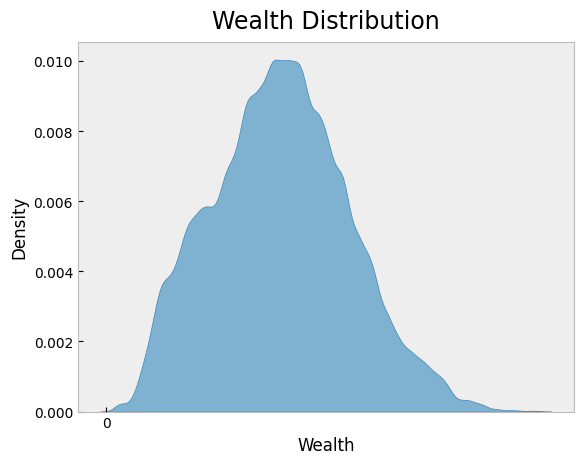

In [ ]:
plt.style.use("bmh")
sns.kdeplot(flattened_wealth_distributions, bw_adjust=0.5, fill=True, alpha=0.6)
plt.title("Wealth Distribution", size=17, pad=10)
plt.xlabel("Wealth")
plt.ylabel("Density")
plt.grid(False)
plt.xticks(range(0, int(max(flattened_wealth_distributions)) + 100, 500))
plt.show()


In [ ]:
print(gini_indices)
print(np.mean(gini_indices))

[0.0612045950239427, 0.07811267231113501, 0.08993106200539097, 0.10192620198728537, 0.10596600377193106, 0.11812340454299422, 0.1260081660998708, 0.13040965688331654, 0.14435480533231823, 0.14301556940156468, 0.15611423668259253, 0.16759856302053136, 0.17192266546244978, 0.17294039083472645, 0.16779812853991594, 0.17701520767367737, 0.18170931335966717, 0.1861693762914025, 0.2002099289715855, 0.2023145933990407, 0.2113549029244271, 0.2182776401943245, 0.21833487123823614, 0.22067240446090783, 0.23008419408615788, 0.23133827805409182, 0.23175996143970218, 0.23289837957610432, 0.23388656205104527, 0.23828008069039744, 0.23766390604393778, 0.24581545221990994, 0.2453837417672331, 0.23783134180053173, 0.23618842877818774, 0.23684879616149127, 0.2330806126657285, 0.2393767917074529, 0.23962821846239885, 0.24247510670127423, 0.23672156201064015, 0.23471880943901383, 0.24297012753450073, 0.2454391200753343, 0.24950216312514795, 0.24747558202794806, 0.2496148041402659, 0.25736412670898307, 0.2

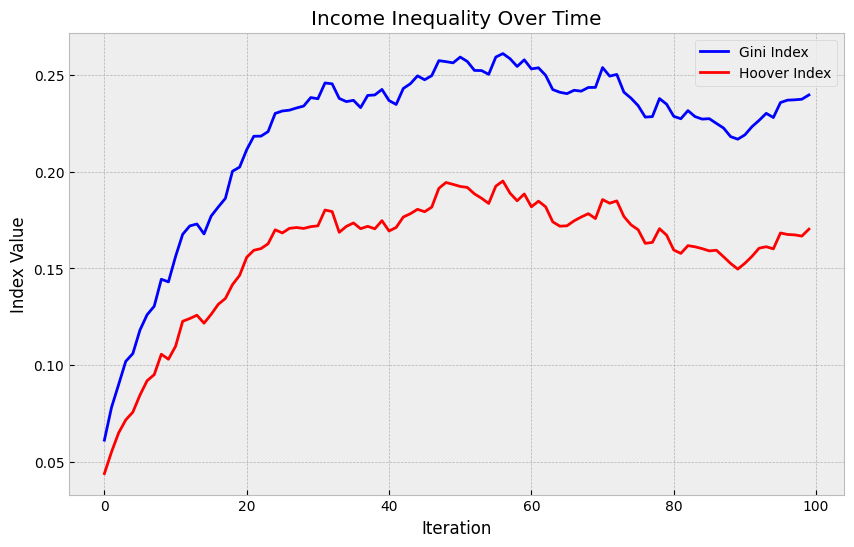

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gini_indices, label='Gini Index', color='blue')
plt.plot(hoover_indices, label='Hoover Index', color='red')
plt.title('Income Inequality Over Time')
plt.xlabel('Iteration')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()